AUC_df_numerical_GDSC (966, 393)
 : 
Range: 0.99504800
Minimum: 0.00479000
Maximum: 0.99983800
Mean: 0.84992505
Median: 0.92596800
Standard Deviation: 0.17917529
Skewness: -1.89574637
binary data:False
-------------------------------------
Shape of binary AUC: (966, 393)
Number of non-NaN values: 181864
AUC_df_numerical_GDSC Ori. Samples Proportion: 84.89%
Proportion kept: 47.90%


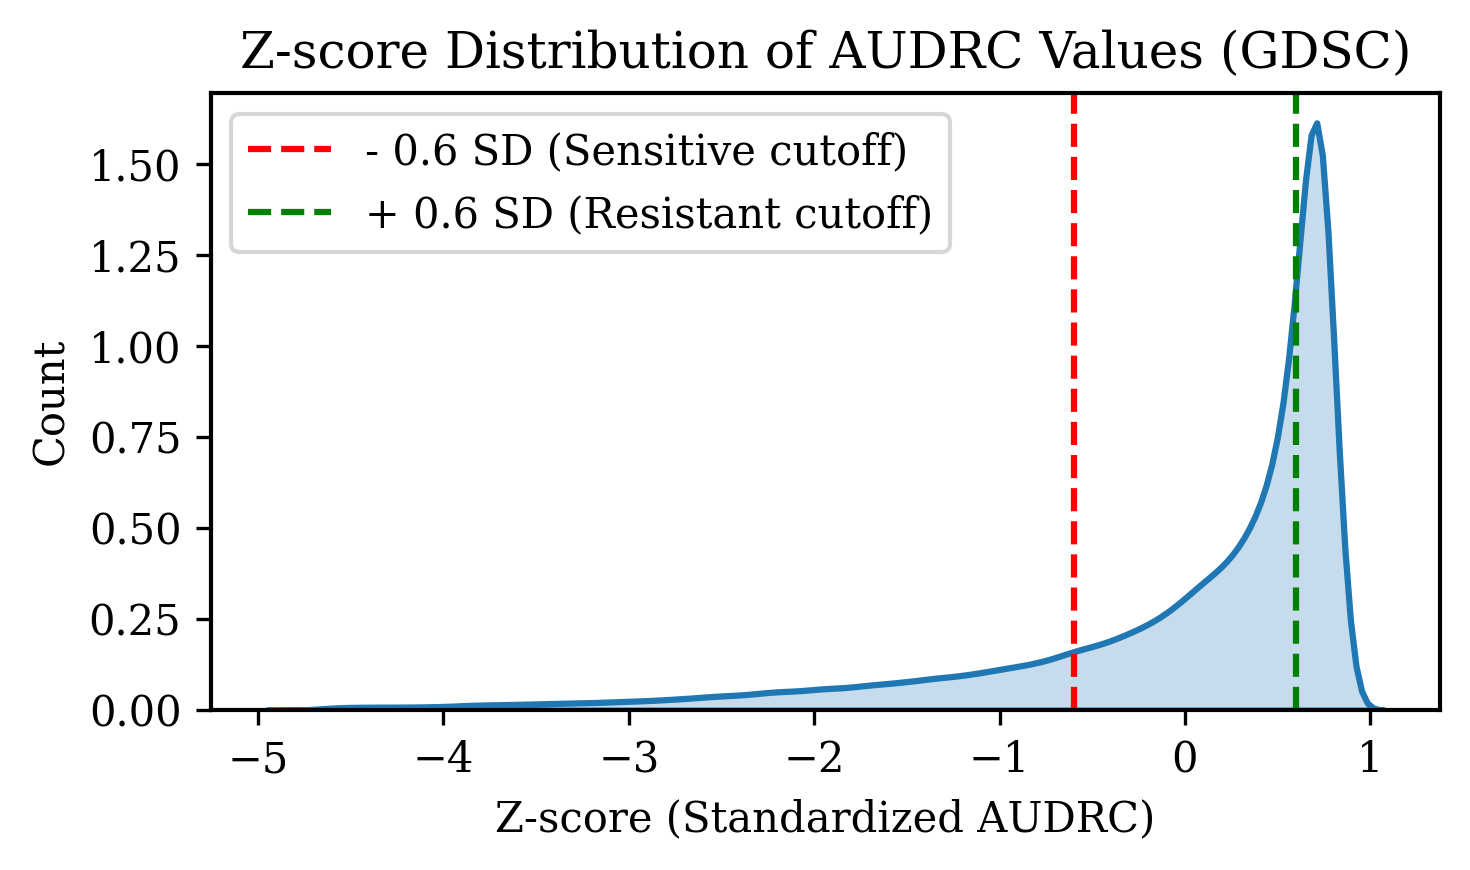

AUC_df_numerical_PRISM (480, 1440)
 : 
Range: 0.99582593
Minimum: 0.00417407
Maximum: 1.00000000
Mean: 0.80430513
Median: 0.84956918
Standard Deviation: 0.16005942
Skewness: -1.63872677
binary data:False
-------------------------------------
Shape of binary AUC: (480, 1440)
Number of non-NaN values: 197604
AUC_df_numerical_PRISM Ori. Samples Proportion: 56.68%
Proportion kept: 28.59%


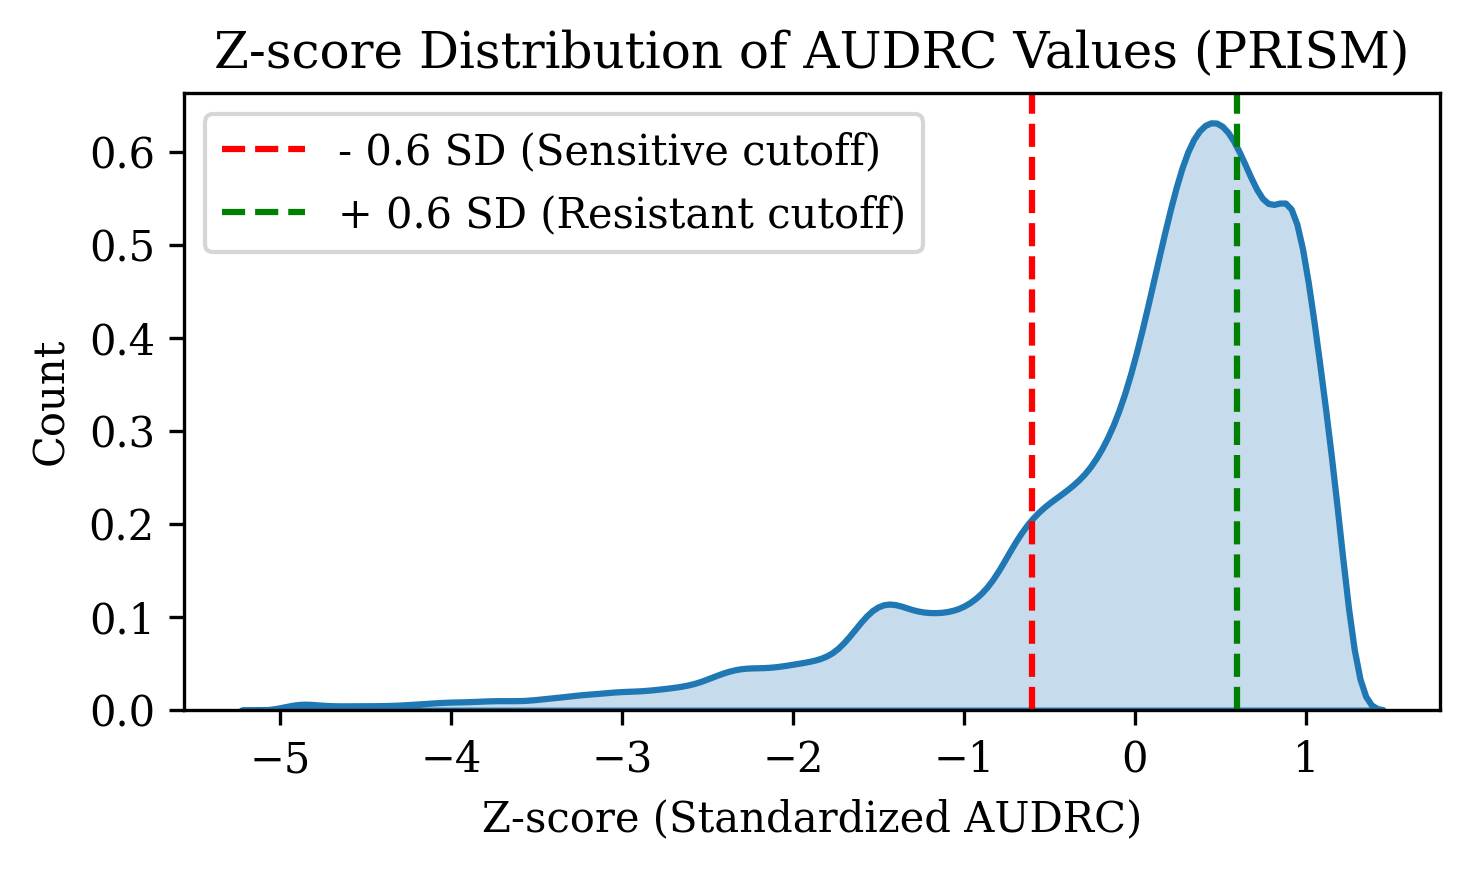

In [22]:
SD_threshold = 0.6
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import  DataLoader, Subset
import torch.nn.init as init
from tools import get_data_value_range
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import matplotlib.font_manager as fm
import matplotlib as mpl

# Set up high-quality rendering
# plt.style.use('seaborn')  # Better default style
plt.style.use('default')  # Use default style instead of seaborn
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 300  # Higher resolution
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.figsize'] = (5,3)  # Slightly larger figure
mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 1.0
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['svg.fonttype'] = 'none'  # Use system fonts in SVG
plt.rcParams['pdf.fonttype'] = 42  # Use Type 42 (TrueType) fonts
plt.rcParams["font.family"] = "serif"


plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'  # Explicitly set edge color
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')  # or any color you prefer
    spine.set_linewidth(1)  # adjust thickness as needed
plt.rcParams["font.family"] = "serif"

AUC_df_numerical_GDSC = pd.read_csv("../../data/DAPL/share/gdsc1+2_ccle_AUC_sorted.csv", sep=',', index_col=0) # binary data
print("AUC_df_numerical_GDSC",AUC_df_numerical_GDSC.shape)
get_data_value_range(AUC_df_numerical_GDSC)
flat_values = AUC_df_numerical_GDSC.values.flatten()
mean = np.nanmean(flat_values)
std = np.nanstd(flat_values)
AUC_zscore = (AUC_df_numerical_GDSC - mean) / std
AUC_binary = AUC_zscore.copy()
AUC_binary[(AUC_zscore <= -SD_threshold)] = 1  # Sensitive
AUC_binary[(AUC_zscore >= SD_threshold)] = 0   # Resistant
AUC_binary[(AUC_zscore > -SD_threshold) & (AUC_zscore < SD_threshold)] = np.nan  # 中間剃除
print("Shape of binary AUC:", AUC_binary.shape)
print("Number of non-NaN values:", AUC_binary.notna().sum().sum())
print("AUC_df_numerical_GDSC Ori. Samples Proportion: {:.2f}%".format(100 * AUC_df_numerical_GDSC.notna().sum().sum() / AUC_df_numerical_GDSC.size))
print("Proportion kept: {:.2f}%".format(100 * AUC_binary.notna().sum().sum() / AUC_binary.size))
AUC_binary.to_csv(f"../../data/DAPL/share/GDSC_AUC_binary_labels_zscore_cutoff{SD_threshold}.csv")
# 繪圖
# plt.figure(figsize=(10, 5))
sns.kdeplot(AUC_zscore.values.flatten(), fill=True, linewidth=1.5)
# 加上 cutoff 線
plt.axvline(x=-SD_threshold, color='red', linestyle='--', label=f'- {SD_threshold} SD (Sensitive cutoff)')
plt.axvline(x=SD_threshold, color='green', linestyle='--', label=f'+ {SD_threshold} SD (Resistant cutoff)')
plt.title("Z-score Distribution of AUDRC Values (GDSC)")
plt.xlabel("Z-score (Standardized AUDRC)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

AUC_df_numerical_PRISM = pd.read_csv("../../data/no_Imputation_PRISM_Repurposing_Secondary_Screen_data/Drug_sensitivity_AUC_(PRISM_Repurposing_Secondary_Screen)_subsetted_NOrepeat.csv", sep=',', index_col=0) # binary data
print("AUC_df_numerical_PRISM",AUC_df_numerical_PRISM.shape)
get_data_value_range(AUC_df_numerical_PRISM)
flat_values = AUC_df_numerical_PRISM.values.flatten()
mean = np.nanmean(flat_values)
std = np.nanstd(flat_values)
AUC_zscore = (AUC_df_numerical_PRISM - mean) / std
AUC_binary = AUC_zscore.copy()
AUC_binary[(AUC_zscore <= -SD_threshold)] = 1  # Sensitive
AUC_binary[(AUC_zscore >= SD_threshold)] = 0   # Resistant
AUC_binary[(AUC_zscore > -SD_threshold) & (AUC_zscore < SD_threshold)] = np.nan  # 中間剃除
print("Shape of binary AUC:", AUC_binary.shape)
print("Number of non-NaN values:", AUC_binary.notna().sum().sum())
print("AUC_df_numerical_PRISM Ori. Samples Proportion: {:.2f}%".format(100 * AUC_df_numerical_PRISM.notna().sum().sum() / AUC_df_numerical_PRISM.size))
print("Proportion kept: {:.2f}%".format(100 * AUC_binary.notna().sum().sum() / AUC_binary.size))
AUC_binary.to_csv(f"../../data/no_Imputation_PRISM_Repurposing_Secondary_Screen_data/PRISM_AUDRC_binary_label_zscore_cutoff{SD_threshold}.csv")
# 繪圖
# plt.figure(figsize=(10, 5))
sns.kdeplot(AUC_zscore.values.flatten(), fill=True, linewidth=1.5)
# 加上 cutoff 線
plt.axvline(x=-SD_threshold, color='red', linestyle='--', label=f'- {SD_threshold} SD (Sensitive cutoff)')
plt.axvline(x=SD_threshold, color='green', linestyle='--', label=f'+ {SD_threshold} SD (Resistant cutoff)')
plt.title("Z-score Distribution of AUDRC Values (PRISM)")
plt.xlabel("Z-score (Standardized AUDRC)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# (1) convert PDAC MAF mutation info to binary encoding which 1 represents gene having mutation on CDS

In [26]:
import numpy as np

# Step 1: Define the data matrix z_a
z_a = np.array([
    [0.1, 100],
    [0.2, 200],
    [0.7, 700]
])

# Step 2: Compute the covariance matrix
z_a_centered = z_a - np.mean(z_a, axis=0)
print(z_a_centered)
# Step 3: Compute the covariance matrix manually
N = z_a_centered.shape[0]  # Number of samples
cov_z_a_manual = (z_a_centered.T @ z_a_centered) / (N - 1)
print(z_a_centered.T @ z_a_centered)


# Alternatively, we can use numpy's built-in function to verify
np_cov_z_a = np.cov(z_a.T)

print("Covariance matrix calculated manually:\n", cov_z_a_manual)
print("\nCovariance matrix using numpy's np.cov:\n", np_cov_z_a)

[[-2.33333333e-01 -2.33333333e+02]
 [-1.33333333e-01 -1.33333333e+02]
 [ 3.66666667e-01  3.66666667e+02]]
[[2.06666667e-01 2.06666667e+02]
 [2.06666667e+02 2.06666667e+05]]
Covariance matrix calculated manually:
 [[1.03333333e-01 1.03333333e+02]
 [1.03333333e+02 1.03333333e+05]]

Covariance matrix using numpy's np.cov:
 [[1.03333333e-01 1.03333333e+02]
 [1.03333333e+02 1.03333333e+05]]


In [24]:
# find out unique samples in PDAC_unique_642_Quadruplet.csv
import pandas as pd

PDAC_df = pd.read_csv("./PDAC_unique_642_Quadruplet.csv", sep=',') # With index_col=0, the Patient_ID column will be used as the row index

# Identify duplicated rows
duplicated_mask = PDAC_df.duplicated(subset=['Patient_ID', 'GeneName', 'CDSmut', 'ChemoRegimen'],keep=False)

# Separate unique and duplicated rows
PDAC_df_unique_rows = PDAC_df[~duplicated_mask | duplicated_mask & ~PDAC_df.duplicated(subset=['Patient_ID', 'GeneName', 'CDSmut', 'ChemoRegimen'], keep='first')]
# ~duplicated_mask:只出現一次
# duplicated_mask = PDAC_df.duplicated(,keep=False):出現超過一次
# ~PDAC_df.duplicated( ,keep='first') : 重複的就保留第一個

In [63]:
# use PDAC_df_unique_rows dataframe to generate PDAC_unique_383_Pair_binary_mutation_withoutCNV.csv

# Initialize data structures
patient_ids = set()
gene_names = set()
patient_gene_data = {}
co=0
uni_count=0
splic_count=0
cnv=0
for idx, row in PDAC_df_unique_rows.iterrows():
     if row[26]=="Unique":#0<idx<=sample_count 
          uni_count+=1
          print(row[26])
          patient_id=str(row[0])
          gene_name=row[19].strip() # .strip()去除頭尾的空白格
          print(gene_name)
          AAmut= str(row[20]).strip() 
          # AAmut = [mut.split(' ')[0] for mut in AAmut] #  p.I655V 後面常常會有空格，會造成誤判
          print(AAmut)
          CDSmut= row[21].strip() 
          if "Copy" not in CDSmut: # exclude cope number variable 
               if AAmut and (("?" not in AAmut) and ("nan" not in AAmut))  : # if 有protein change # exclude Splice_Site 
                    co+=1
                    patient_ids.add(patient_id)
                    gene_names.add(gene_name)
                    # Initialize dictionary for each patient
                    if patient_id not in patient_gene_data:
                         patient_gene_data[patient_id] = {}
                    # Mark the presence of the gene mutation
                    patient_gene_data[patient_id][gene_name] = 1
               else:
                    splic_count+=1
                    print("Splice_Site" )
                    print('AAmut',AAmut,"CDSmut",CDSmut,row[27])
                    print(idx)
          else:
               cnv+=1
               print("*"*30)
               print("CNV",CDSmut,'AAmut',AAmut)

print('co',co)
print("uni_count",uni_count)
print("splic_count",splic_count)
print('cnv',cnv)
# Step 2: Prepare the unique Patient IDs and Gene Names
patient_ids = sorted(patient_ids, key=int) # sort by str會是106最小，因為開頭是1
gene_names = sorted(gene_names)

print(patient_ids)
print(len(patient_ids))
print(gene_names)
print(len(gene_names))

print([i for i in patient_gene_data['90']])

# Step 3: Write the output CSV file
outputfilename = "./PDAC_unique_383_Pair_binary_mutation_withoutCNV.csv"

with open(outputfilename, mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    # Write the header
    header = ['Patient_ID'] + gene_names
    writer.writerow(header)
    # Write the data rows
    for patient_id in patient_ids:
        row = [patient_id]
        for gene_name in gene_names:
            if gene_name in patient_gene_data[patient_id]:
                row.append(1)
            else:
                row.append(0)
        writer.writerow(row)
print("CSV file has been written successfully.")

Unique
BRCA1
p.K1183R
Unique
TP53
p.P72R
Unique
FGFR4
p.G388R
Unique
ASXL1
p.L815P
Unique
CCND3
p.S259A
Unique
BRCA1
p.K1183R
Unique
TP53
p.P72R
Unique
FGFR4
p.G388R
Unique
ASXL1
p.L815P
Unique
CCND3
p.S259A
Unique
KRAS
p.G12C
Unique
TP53
p.S94*
Unique
FGFR4
p.G388R
Unique
ERBB2
p.I655V
Unique
ERBB2
p.P1170A
Unique
ASXL1
p.L815P
Unique
CCND3
p.S259A
Unique
KRAS
p.G12C
Unique
TP53
p.S94*
Unique
FGFR4
p.G388R
Unique
ERBB2
p.I655V
Unique
ERBB2
p.P1170A
Unique
ASXL1
p.L815P
Unique
CCND3
p.S259A
Unique
KRAS
p.G12R
Unique
CCND1
nan
******************************
CNV Copy number gain (4 copies) AAmut nan
Unique
TP53
p.C176R
Unique
TP53
p.P72R
Unique
ARID1A
p.S658Efs*18
Unique
FGFR3
nan
******************************
CNV Copy number gain (4 copies) AAmut nan
Unique
MYC
nan
******************************
CNV Copy number gain (3 copies) AAmut nan
Unique
FGFR1
nan
******************************
CNV Copy number gain (5 copies) AAmut nan
Unique
FGF8
nan
******************************
CNV Copy numbe

In [64]:
# withoutCNV

import csv
inputfilename ="./PDAC_unique_642_Quadruplet.csv"
# Initialize data structures
patient_ids = set()
gene_names = set()
patient_gene_data = {}
with open(inputfilename, 'r') as inputfile:
    reader = csv.reader(inputfile)# Create a CSV reader object
    # sample_count=642 # 共有642比unique資料
    co=0
    uni_count=0
    splic_count=0
    cnv=0
    for idx,row in enumerate(reader):
        if row[26]=="Unique":#0<idx<=sample_count 
            uni_count+=1
            print(row[26])
            patient_id=row[0]
            gene_name=row[19].strip() # .strip()去除頭尾的空白格
            print(gene_name)
            AAmut= row[20].strip() 
            # AAmut = [mut.split(' ')[0] for mut in AAmut] #  p.I655V 後面常常會有空格，會造成誤判
            print(AAmut)
            CDSmut= row[21].strip() 
            if "Copy" not in CDSmut: # exclude cope number variable 
                if AAmut and "?" not in AAmut : # if 有protein change # exclude Splice_Site 
                    co+=1
                    patient_ids.add(patient_id)
                    gene_names.add(gene_name)
                    # Initialize dictionary for each patient
                    if patient_id not in patient_gene_data:
                        patient_gene_data[patient_id] = {}
                    # Mark the presence of the gene mutation
                    patient_gene_data[patient_id][gene_name] = 1
                else:
                    splic_count+=1
                    print("Splice_Site" )
                    print('AAmut',AAmut,"CDSmut",CDSmut,row[27])
                    print(idx)
            else:
                cnv+=1
                print("*"*30)
                print("CNV",CDSmut,'AAmut',AAmut)

    print('co',co)
    print("uni_count",uni_count)
    print("splic_count",splic_count)
    print('cnv',cnv)
# Step 2: Prepare the unique Patient IDs and Gene Names
patient_ids = sorted(patient_ids, key=int) # sort by str會是106最小，因為開頭是1
gene_names = sorted(gene_names)

print(patient_ids)
print(len(patient_ids))
print(gene_names)
print(len(gene_names))

print([i for i in patient_gene_data['90']])

# Step 3: Write the output CSV file
outputfilename = "./PDAC_unique_383_Pair_binary_mutation_withoutCNV.csv"

with open(outputfilename, mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    # Write the header
    header = ['Patient_ID'] + gene_names
    writer.writerow(header)
    # Write the data rows
    for patient_id in patient_ids:
        row = [patient_id]
        for gene_name in gene_names:
            if gene_name in patient_gene_data[patient_id]:
                row.append(1)
            else:
                row.append(0)
        writer.writerow(row)
print("CSV file has been written successfully.")

Unique
BRCA1
p.K1183R
Unique
TP53
p.P72R
Unique
FGFR4
p.G388R
Unique
ASXL1
p.L815P
Unique
CCND3
p.S259A
Unique
BRCA1
p.K1183R
Unique
TP53
p.P72R
Unique
FGFR4
p.G388R
Unique
ASXL1
p.L815P
Unique
CCND3
p.S259A
Unique
KRAS
p.G12C
Unique
TP53
p.S94*
Unique
FGFR4
p.G388R
Unique
ERBB2
p.I655V
Unique
ERBB2
p.P1170A
Unique
ASXL1
p.L815P
Unique
CCND3
p.S259A
Unique
KRAS
p.G12C
Unique
TP53
p.S94*
Unique
FGFR4
p.G388R
Unique
ERBB2
p.I655V
Unique
ERBB2
p.P1170A
Unique
ASXL1
p.L815P
Unique
CCND3
p.S259A
Unique
KRAS
p.G12R
Unique
CCND1

******************************
CNV Copy number gain (4 copies) AAmut 
Unique
TP53
p.C176R
Unique
TP53
p.P72R
Unique
ARID1A
p.S658Efs*18
Unique
FGFR3

******************************
CNV Copy number gain (4 copies) AAmut 
Unique
MYC

******************************
CNV Copy number gain (3 copies) AAmut 
Unique
FGFR1

******************************
CNV Copy number gain (5 copies) AAmut 
Unique
FGF8

******************************
CNV Copy number gain (3 copies) AAmut 
Un

In [21]:
# withCNV

import csv
inputfilename ="./PDAC_unique_642_Quadruplet.csv"
# Initialize data structures
patient_ids = set()
gene_names = set()
patient_gene_data = {}
with open(inputfilename, 'r') as inputfile:
    reader = csv.reader(inputfile)# Create a CSV reader object
    # sample_count=642 # 共有642比unique資料
    co=0
    for idx,row in enumerate(reader):
        if row[26]=="Unique":#0<idx<=sample_count 
            print(row[26])
            patient_id=row[0]
            gene_name=row[19].strip()
            AAmut= row[20].strip()
            print(AAmut)
            # AAmut = [mut.split(' ')[0] for mut in AAmut] #  p.I655V 會面常常會有空格，會造成誤判
            CDSmut= row[21].strip()
            if AAmut and "?" not in AAmut : # if 有protein change # exclude Splice_Site # CNV和Splice的AAmut都會有nan
                co+=1
                patient_ids.add(patient_id)
                gene_names.add(gene_name)
                # Initialize dictionary for each patient
                if patient_id not in patient_gene_data:
                    patient_gene_data[patient_id] = {}
                # Mark the presence of the gene mutation
                patient_gene_data[patient_id][gene_name] = 1
            else:
                print('Splice_Site AAmut',AAmut)
                print(idx)
            if "Copy" in CDSmut:
                co+=1
                patient_ids.add(patient_id)
                gene_names.add(gene_name)
                # Initialize dictionary for each patient
                if patient_id not in patient_gene_data:
                    patient_gene_data[patient_id] = {}
                # Mark the presence of the gene mutation
                patient_gene_data[patient_id][gene_name] = 1

                print("*"*30)
                print("CNV",CDSmut)
    print('co',co)
# Step 2: Prepare the unique Patient IDs and Gene Names
patient_ids = sorted(patient_ids, key=int) # sort by str會是106最小，因為開頭是1
gene_names = sorted(gene_names)

print(patient_ids)
print(len(patient_ids))
print(gene_names)
print(len(gene_names))

print([i for i in patient_gene_data['90']])

# Step 3: Write the output CSV file
outputfilename = "./PDAC_unique_413_Pair_binary_mutation_withCNV.csv"

with open(outputfilename, mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    # Write the header
    header = ['Patient_ID'] + gene_names
    writer.writerow(header)
    # Write the data rows
    for patient_id in patient_ids:
        row = [patient_id]
        for gene_name in gene_names:
            if gene_name in patient_gene_data[patient_id]:
                row.append(1)
            else:
                row.append(0)
        writer.writerow(row)
print("CSV file has been written successfully.")

Unique
p.K1183R
Unique
p.P72R
Unique
p.G388R
Unique
p.L815P
Unique
p.S259A
Unique
p.K1183R
Unique
p.P72R
Unique
p.G388R
Unique
p.L815P
Unique
p.S259A
Unique
p.G12C
Unique
p.S94*
Unique
p.G388R
Unique
p.I655V
Unique
p.P1170A
Unique
p.L815P
Unique
p.S259A
Unique
p.G12C
Unique
p.S94*
Unique
p.G388R
Unique
p.I655V
Unique
p.P1170A
Unique
p.L815P
Unique
p.S259A
Unique
p.G12R
Unique

Splice_Site AAmut 
250
******************************
CNV Copy number gain (4 copies)
Unique
p.C176R
Unique
p.P72R
Unique
p.S658Efs*18
Unique

Splice_Site AAmut 
254
******************************
CNV Copy number gain (4 copies)
Unique

Splice_Site AAmut 
255
******************************
CNV Copy number gain (3 copies)
Unique

Splice_Site AAmut 
256
******************************
CNV Copy number gain (5 copies)
Unique

Splice_Site AAmut 
257
******************************
CNV Copy number gain (3 copies)
Unique
p.L815P
Unique
p.S259A
Unique
p.G12R
Unique

Splice_Site AAmut 
382
******************************
CNV

In [19]:
inputfilename="./PDAC_unique_383_Pair_binary_mutation_withCNV.csv"
with open(inputfilename, 'r') as inputfile:
    reader = csv.reader(inputfile)# Create a CSV reader object
    inst=0
    for idx,row in enumerate(reader): 
        inst+=row.count('1')
print(inst)

413


In [26]:
import pandas as pd
withoutCNV_df = pd.read_csv("./PDAC_unique_383_Pair_binary_mutation_withoutCNV.csv", sep=',', index_col=0)
withCNV_df = pd.read_csv("./PDAC_unique_413_Pair_binary_mutation_withCNV.csv", sep=',', index_col=0)

In [27]:
mismatched_samplenames_withoutCNV = sorted(set(withoutCNV_df.columns) - set(withCNV_df.columns))
mismatched_samplenames_withCNV = sorted(set(withCNV_df.columns) - set(withoutCNV_df.columns))

print("mismatched_samplenames_withCNV",mismatched_samplenames_withCNV)#these mutation are all CNV
print("mismatched_samplenames_withuotCNV",mismatched_samplenames_withoutCNV)

mismatched_samplenames_withCNV ['AKT2', 'CCND1', 'CCNE1', 'CDK6', 'EGFR', 'FGF10', 'FGF14', 'FGF8', 'FGF9', 'FGFR', 'FGFR1', 'FGFR3', 'LAMP1', 'MYC', 'NRG1']
mismatched_samplenames_withuotCNV []


# convert TCGA MAF mutation info to binary encoding which 1 represents gene having mutation on CDS

mut-PAAD

mut-BLCA

In [1]:
cancer_type = "BRCA"
import csv
inputfilename =f"./TCGA _rawdata_maf/mut-{cancer_type}.csv"
outputfilename = f"./TCGA _rawdata_maf/mut-{cancer_type}_binary_excludeSpliceSite.csv"
# Initialize data structures
Tumor_Sample_ids = set()
gene_names = set()
patient_gene_data = {}
with open(inputfilename, 'r') as inputfile:
    reader = csv.reader(inputfile)# Create a CSV reader object
    for idx,row in enumerate(reader):
        if 0<idx:
            Tumor_Sample_id=row[17] # Tumor_Sample_Barcode
            # HGVSp_Short=row[38]# HGVSp_Short 是否影響Protein #SpliceSite as 1
            HGVSp=row[37]# HGVSp 是否影響Protein
            gene_name = row[2] #Hugo_Symbol
            # if "=" not in HGVSp_Short and HGVSp_Short != "NA":#並非'='或"NA" #SpliceSite as 1
            if "=" not in HGVSp and HGVSp != "NA":#並非'='或"NA"#SpliceSite as 0
                Tumor_Sample_ids.add(Tumor_Sample_id)
                gene_names.add(gene_name)
                # Initialize dictionary for each patient
                if Tumor_Sample_id not in patient_gene_data:
                    patient_gene_data[Tumor_Sample_id] = {}
                # Mark the presence of the gene mutation
                patient_gene_data[Tumor_Sample_id][gene_name] = 1
# Step 2: Prepare the unique Patient IDs and Gene Names
import re
def alphanumeric_sort_key(s):# sort Tumor_Sample_ids by the alphabet and number
    # Split the string into a list of alternating numeric and non-numeric parts
    parts = re.split('([0-9]+)', s)
    # Convert numeric parts to integers for proper numerical sorting
    return [int(part) if part.isdigit() else part for part in parts]

Tumor_Sample_ids = sorted(Tumor_Sample_ids, key=alphanumeric_sort_key)
gene_names = sorted(gene_names)
# print(Tumor_Sample_ids)
# print(gene_names)            
#print([i for i in patient_gene_data['0023']])
# Step 3: Write the output CSV file
with open(outputfilename, mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    # Write the header
    header = ['Tumor_Sample_id'] + gene_names
    writer.writerow(header)
    # Write the data rows
    for Tumor_Sample_id in Tumor_Sample_ids:
        row = [Tumor_Sample_id]
        for gene_name in gene_names:
            if gene_name in patient_gene_data[Tumor_Sample_id]:
                row.append(1)
            else:
                row.append(0)
        writer.writerow(row)
print("CSV file has been written successfully.")

CSV file has been written successfully.


In [2]:
inputfilename = f"./TCGA _rawdata_maf/mut-{cancer_type}_binary_excludeSpliceSite.csv"
with open(inputfilename, 'r') as inputfile:
    reader = csv.reader(inputfile)# Create a CSV reader object
    instance_count=0
    tumer_sample_count=0
    for idx,row in enumerate(reader): 
        if idx>0:
            instance_count+=row.count('1')
            tumer_sample_count+=1
print(len(row)-1)#gene count
print(instance_count)
print(tumer_sample_count)

15327
62508
986


### all TCGA data

In [1]:
import csv
outputfilename = "./TCGA _rawdata_maf/All_TCGA_mut_binary_excludeSpliceSite.csv"
# Initialize data structures
Tumor_Sample_ids = set()
gene_names = set()
patient_gene_data = {}
filelist = ["./TCGA _rawdata_maf/mut-BLCA.csv","./TCGA _rawdata_maf/mut-BRCA.csv","./TCGA _rawdata_maf/mut-CHOL.csv"
           ,"./TCGA _rawdata_maf/mut-COAD.csv","./TCGA _rawdata_maf/mut-ESCA.csv","./TCGA _rawdata_maf/mut-GBM.csv"
           ,"./TCGA _rawdata_maf/mut-HNSC.csv","./TCGA _rawdata_maf/mut-KIRC.csv","./TCGA _rawdata_maf/mut-LGG.csv"
           ,"./TCGA _rawdata_maf/mut-LIHC.csv","./TCGA _rawdata_maf/mut-LUAD.csv","./TCGA _rawdata_maf/mut-LUSC.csv"
           ,"./TCGA _rawdata_maf/mut-OV.csv","./TCGA _rawdata_maf/mut-PAAD.csv","./TCGA _rawdata_maf/mut-PRAD.csv"
           ,"./TCGA _rawdata_maf/mut-READ.csv","./TCGA _rawdata_maf/mut-SKCM.csv","./TCGA _rawdata_maf/mut-STAD.csv"
           ,"./TCGA _rawdata_maf/mut-THCA.csv","./TCGA _rawdata_maf/mut-UCEC.csv"]
for inputfilename in filelist  :  
    with open(inputfilename, 'r') as inputfile:
        reader = csv.reader(inputfile)# Create a CSV reader object
    
        for idx,row in enumerate(reader):
            if 0<idx:
                Tumor_Sample_id=row[17] # Tumor_Sample_Barcode
                HGVSp=row[37]# HGVSp 是否影響Protein
                gene_name = row[2] #Hugo_Symbol
                if "=" not in HGVSp and HGVSp != "NA":#並非'='或"NA"#SpliceSite as 0
                    Tumor_Sample_ids.add(Tumor_Sample_id)
                    gene_names.add(gene_name)
                    # Initialize dictionary for each patient
                    if Tumor_Sample_id not in patient_gene_data:
                        patient_gene_data[Tumor_Sample_id] = {}
                    # Mark the presence of the gene mutation
                    patient_gene_data[Tumor_Sample_id][gene_name] = 1
                # else:
                #     print(HGVSp)
# Step 2: Prepare the unique Patient IDs and Gene Names
import re
def alphanumeric_sort_key(s):# sort Tumor_Sample_ids by the alphabet and number
    # Split the string into a list of alternating numeric and non-numeric parts
    parts = re.split('([0-9]+)', s)
    # Convert numeric parts to integers for proper numerical sorting
    return [int(part) if part.isdigit() else part for part in parts]

Tumor_Sample_ids = sorted(Tumor_Sample_ids, key=alphanumeric_sort_key)
gene_names = sorted(gene_names)
# print(Tumor_Sample_ids)
# print(gene_names)            
#print([i for i in patient_gene_data['0023']])
# Step 3: Write the output CSV file
with open(outputfilename, mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    # Write the header
    header = ['Tumor_Sample_id'] + gene_names
    writer.writerow(header)
    # Write the data rows
    for Tumor_Sample_id in Tumor_Sample_ids:
        row = [Tumor_Sample_id]
        for gene_name in gene_names:
            if gene_name in patient_gene_data[Tumor_Sample_id]:
                row.append(1)
            else:
                row.append(0)
        writer.writerow(row)
print("CSV file has been written successfully.")

['TCGA-02-0003-01A-01D-1490-08', 'TCGA-02-0033-01A-01D-1490-08', 'TCGA-02-0047-01A-01D-1490-08', 'TCGA-02-0055-01A-01D-1490-08', 'TCGA-02-2466-01A-01W-0837-08', 'TCGA-02-2470-01A-01D-1494-08', 'TCGA-02-2470-01A-01W-0837-08', 'TCGA-02-2483-01A-01D-1494-08', 'TCGA-02-2485-01A-01D-1494-08', 'TCGA-02-2485-01A-01W-0837-08', 'TCGA-02-2486-01A-01D-1494-08', 'TCGA-02-2486-01A-01W-0837-08', 'TCGA-2A-A8VL-01A-21D-A377-08', 'TCGA-2A-A8VO-01A-11D-A377-08', 'TCGA-2A-A8VT-01A-11D-A377-08', 'TCGA-2A-A8VV-01A-11D-A377-08', 'TCGA-2A-A8VX-01A-11D-A377-08', 'TCGA-2A-A8W1-01A-11D-A377-08', 'TCGA-2A-A8W3-01A-11D-A377-08', 'TCGA-2A-AAYF-01A-11D-A41K-08', 'TCGA-2A-AAYO-01A-11D-A41K-08', 'TCGA-2A-AAYU-01A-11D-A41K-08', 'TCGA-2E-A9G8-01A-11D-A403-09', 'TCGA-2F-A9KO-01A-11D-A38G-08', 'TCGA-2F-A9KP-01A-11D-A38G-08', 'TCGA-2F-A9KQ-01A-11D-A38G-08', 'TCGA-2F-A9KR-01A-11D-A38G-08', 'TCGA-2F-A9KT-01A-11D-A38G-08', 'TCGA-2F-A9KW-01A-11D-A38G-08', 'TCGA-2H-A9GF-01A-11D-A37C-09', 'TCGA-2H-A9GH-01A-11D-A37C-09', 'TCGA-2

In [16]:
inputfilename="./TCGA _rawdata_maf/All_TCGA_mut_binary.csv"
with open(inputfilename, 'r') as inputfile:
    reader = csv.reader(inputfile)# Create a CSV reader object
    instance_count=0
    tumer_sample_count=0
    for idx,row in enumerate(reader): 
        if idx>0:
            instance_count+=row.count('1')
            tumer_sample_count+=1
print('gene count:',len(row)-1) #gene count
print('mutation instance count:',instance_count) # as 1
print('tumer sample count:',tumer_sample_count)

gene count: 18819
mutation instance count: 1536756
tumer sample count 8667


In [2]:
inputfilename="./TCGA _rawdata_maf/All_TCGA_mut_binary_excludeSpliceSite.csv"
with open(inputfilename, 'r') as inputfile:
    reader = csv.reader(inputfile)# Create a CSV reader object
    instance_count=0
    tumer_sample_count=0
    for idx,row in enumerate(reader): 
        if idx>0:
            instance_count+=row.count('1')
            tumer_sample_count+=1
print('gene count:',len(row)-1) #gene count
print('mutation instance count:',instance_count) # as 1
print('tumer sample count:',tumer_sample_count)

gene count: 18801
mutation instance count: 1510163
tumer sample count: 8666


# compare raw TCGA sample and Winnie TCGA sample

In [3]:
import pandas as pd
winnieTCGA_df = pd.read_csv("~/Winnie/data/tcga_matched_ccle_mutation.txt", sep='\t', index_col=0)
TCGA_df = pd.read_csv("./TCGA _rawdata_maf/All_TCGA_mut_binary_excludeSpliceSite.csv", sep=',', index_col=0)

In [6]:
TCGA_columns = set(TCGA_df.T.columns)
winnieTCGA_columns = set(winnieTCGA_df.T.columns)
# Find mismatched sample names
mismatched_samplenames_TCGA = sorted(TCGA_columns - winnieTCGA_columns)
mismatched_samplenames_winnieTCGA = sorted(winnieTCGA_columns - TCGA_columns)
mismatched_samplenames_TCGA

[]

In [29]:
mismatched_samplenames_winnieTCGA

['TCGA-AO-A1KO-01A-31D-A188-09',
 'TCGA-CH-5789-01A-11D-1576-08',
 'TCGA-EL-A3H3-01A-11D-A202-08',
 'TCGA-EL-A3ZN-01A-11D-A23M-08',
 'TCGA-F2-6880-01A-11D-2154-08',
 'TCGA-FB-A4P6-01A-12D-A26I-08',
 'TCGA-FC-A66V-01A-21D-A30E-08',
 'TCGA-IB-AAUW-01A-12D-A38G-08',
 'TCGA-IG-A4QT-01A-21D-A27G-09',
 'TCGA-P5-A5EY-01A-11D-A27K-08',
 'TCGA-P5-A5F6-01A-11D-A289-08']

In [5]:
mismatched_samplenames_winnieTCGA

['TCGA-AO-A1KO-01A-31D-A188-09',
 'TCGA-CH-5789-01A-11D-1576-08',
 'TCGA-EJ-A7NK-01A-12D-A34U-08',
 'TCGA-EL-A3H3-01A-11D-A202-08',
 'TCGA-EL-A3ZN-01A-11D-A23M-08',
 'TCGA-F2-6880-01A-11D-2154-08',
 'TCGA-FB-A4P6-01A-12D-A26I-08',
 'TCGA-FC-A66V-01A-21D-A30E-08',
 'TCGA-IB-AAUW-01A-12D-A38G-08',
 'TCGA-IG-A4QT-01A-21D-A27G-09',
 'TCGA-P5-A5EY-01A-11D-A27K-08',
 'TCGA-P5-A5F6-01A-11D-A289-08']

# convert CCLE MAF mutation info to binary encoding which 1 represents gene having mutation on CDS

In [12]:
import csv
inputfilename = "/root/data/CCLE/CCLE_OmicsSomaticMutations.csv"
outputfilename = "/root/data/CCLE/CCLE_raw_SomaticMut_binary_VEPhigh.csv"

# Initialize data structures
ccl_Sample_ids = set()
gene_names = set()
ccl_gene_data = {}

with open(inputfilename, 'r') as inputfile:
    reader = csv.reader(inputfile)# Create a CSV reader object
    for idx,row in enumerate(reader):
        if 0<idx:
            ccl_Sample_id=row[64] # ModelID
            ProteinChange = row[13]# ProteinChange 是否影響Protein
            VEPimpact = row[28]
            gene_name = row[14] #Hugo_Symbol
            if ("=" not in ProteinChange and ProteinChange != "NA") or VEPimpact == "HIGH": #並非'='或"NA" 或是splice_site
                ccl_Sample_ids.add(ccl_Sample_id)
                gene_names.add(gene_name)
                # Initialize dictionary for each patient
                if ccl_Sample_id not in ccl_gene_data:
                    ccl_gene_data[ccl_Sample_id] = {}
                # Mark the presence of the gene mutation
                ccl_gene_data[ccl_Sample_id][gene_name] = 1
            
# Step 2: Prepare the unique Patient IDs and Gene Names
import re
def alphanumeric_sort_key(s):# sort ccl_Sample_ids by the alphabet and number
    # Split the string into a list of alternating numeric and non-numeric parts
    parts = re.split('([0-9]+)', s)
    # Convert numeric parts to integers for proper numerical sorting
    return [int(part) if part.isdigit() else part for part in parts]

ccl_Sample_ids = sorted(ccl_Sample_ids, key=alphanumeric_sort_key)
gene_names = sorted(gene_names)
print("len(ccl_Sample_ids)",len(ccl_Sample_ids))
print("len(gene_names)",len(gene_names))
# print(ccl_Sample_ids)
# print(gene_names)            

#print([i for i in ccl_gene_data['0023']])
# Step 3: Write the output CSV file
with open(outputfilename, mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    # Write the header
    header = ['ccl_Sample_id'] + gene_names
    writer.writerow(header)
    # Write the data rows
    for ccl_Sample_id in ccl_Sample_ids:
        row = [ccl_Sample_id]
        for gene_name in gene_names:
            if gene_name in ccl_gene_data[ccl_Sample_id]:
                row.append(1)
            else:
                row.append(0)
        writer.writerow(row)
print("CSV file has been written successfully.")

len(ccl_Sample_ids) 1788
len(gene_names) 19450
CSV file has been written successfully.


In [6]:
inputfilename="/root/data/CCLE/CCLE_raw_SomaticMut_binary.csv"
with open(inputfilename, 'r') as inputfile:
    reader = csv.reader(inputfile)# Create a CSV reader object
    instance_count=0
    ccl_sample_count=0
    for idx,row in enumerate(reader): 
        if idx>0:
            instance_count+=row.count('1')
            ccl_sample_count+=1
print('gene count:',len(row)-1) #gene count
print('mutation instance count:',instance_count) # as 1
print('ccl sample count:',ccl_sample_count)

gene count: 19450
mutation instance count: 609234
ccl sample count: 1788


In [11]:
inputfilename="/root/data/CCLE/CCLE_raw_SomaticMut_binary_VEPhigh.csv"
with open(inputfilename, 'r') as inputfile:
    reader = csv.reader(inputfile)# Create a CSV reader object
    instance_count=0
    ccl_sample_count=0
    for idx,row in enumerate(reader): 
        if idx>0:
            instance_count+=row.count('1')
            ccl_sample_count+=1
print('gene count:',len(row)-1) #gene count
print('mutation instance count:',instance_count) # as 1
print('ccl sample count:',ccl_sample_count)

gene count: 19450
mutation instance count: 609236
ccl sample count: 1788
